# 1. **Descarga y exploración del corpus**

## Carga y exploración básica

In [1]:
! wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Video_Games_5.json.gz

--2022-07-03 17:33:12--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Video_Games_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113104579 (108M) [application/x-gzip]
Saving to: ‘reviews_Video_Games_5.json.gz’

reviews_Video_Games 100%[===================>] 107.86M  26.0MB/s    in 8.5s    

2022-07-03 17:33:21 (12.7 MB/s) - ‘reviews_Video_Games_5.json.gz’ saved [113104579/113104579]



In [2]:
import pandas as pd
df_video_games = pd.read_json("reviews_Video_Games_5.json.gz", lines=True, compression='gzip')

In [3]:
df_video_games.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4,DIRT 3,1308009600,"06 14, 2011"


In [4]:
df_video_games.shape

(231780, 9)

In [5]:
#Nos quedamos con las columnas que realmente nos interesan para el proyecto práctica (reviewText y overall)
df_video_games = df_video_games[['reviewText', 'overall']]

In [6]:
df_video_games.head()

,reviewText,overall
0,Installing the game was a struggle (because of...,1
1,If you like rally cars get this game you will ...,4
2,1st shipment received a book instead of the ga...,1
3,"I got this version instead of the PS3 version,...",3
4,I had Dirt 2 on Xbox 360 and it was an okay ga...,4


## Nº de reviews positivas y negativas (y posterior balanceo dataset)

In [7]:
#El número de estrellas van del 1 al 5
print(sorted(df_video_games.overall.unique()))

[1, 2, 3, 4, 5]


In [8]:
#Vamos a comprobar el porcentaje de estrellas que hay en el dataset
df_video_games['overall'].value_counts(normalize=True)

5    0.518531
4    0.236448
3    0.121991
1    0.064082
2    0.058948
Name: overall, dtype: float64

In [9]:
#Considerando que vamos a considerar como reviews negativas las que tengan < 3 estrellas, y positivas las que tengan >= 3 estrellas. Vamos a ver si los datos están desbalanceados.
print("El número de reviews positivas son:",df_video_games.loc[df_video_games.overall.between(3,5), 'overall'].count())
print("El número de reviews negativas son:",df_video_games.loc[df_video_games.overall.between(0, 2.9), 'overall'].count())
print("El porcentaje de reviews positivas es:",round(df_video_games.loc[df_video_games.overall.between(3,5), 'overall'].count() / df_video_games.overall.size * 100, 1))
print("El porcentaje de reviews negativas es:",round(df_video_games.loc[df_video_games.overall.between(0,2.9), 'overall'].count() / df_video_games.overall.size * 100, 1))
print("Podemos ver que el dataset, para el caso que nos ocupa, está claramente desbalanceado, ya que existe un número y porcentaje muy mayor de reviews positivas que negativas.")

El número de reviews positivas son: 203264
El número de reviews negativas son: 28516
El porcentaje de reviews positivas es: 87.7
El porcentaje de reviews negativas es: 12.3
Podemos ver que el dataset, para el caso que nos ocupa, está claramente desbalanceado, ya que existe un número y porcentaje muy mayor de reviews positivas que negativas.


Vamos a aprovechar para balancear el dataset (quitando datos de reviews positivas), y así obtener unos resultados más óptimos en el proyecto

In [10]:
df_video_games_pos = df_video_games[df_video_games.overall >= 3]
df_video_games_neg = df_video_games[df_video_games.overall < 3]

In [11]:
df_video_games_pos_red =  df_video_games_pos.sample(n=28516, random_state= 30)

In [12]:
df_video_games_balanced = pd.concat([df_video_games_pos_red, df_video_games_neg], axis = 0)

In [13]:
print("El número de reviews positivas son:",df_video_games_balanced.loc[df_video_games_balanced.overall.between(3,5), 'overall'].count())
print("El número de reviews negativas son:",df_video_games_balanced.loc[df_video_games_balanced.overall.between(0, 2.9), 'overall'].count())
print("El porcentaje de reviews positivas es:",round(df_video_games_balanced.loc[df_video_games_balanced.overall.between(3,5), 'overall'].count() / df_video_games_balanced.overall.size * 100, 1))
print("El porcentaje de reviews negativas es:",round(df_video_games_balanced.loc[df_video_games_balanced.overall.between(0,2.9), 'overall'].count() / df_video_games_balanced.overall.size * 100, 1))
print("Ahora sí que el dataset está balanceado con el mismo número de reviews positivas que negativas.")

El número de reviews positivas son: 28516
El número de reviews negativas son: 28516
El porcentaje de reviews positivas es: 50.0
El porcentaje de reviews negativas es: 50.0
Ahora sí que el dataset está balanceado con el mismo número de reviews positivas que negativas.


## Frecuencia de palabras

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

In [15]:
df_video_games_balanced.reviewText

158314    love the just dance games  fun  . . . . . . . ...
224238    This is a great game. With so many different c...
52118     "Super Mario 64" for the original Nintendo 64 ...
198323    Ok, before I begin, There are many naysayers b...
54063     If you found Yoshi Touch & Go lacking, DO NOT ...
                                ...                        
231774    The real Mario Kart 8 Wii U bundle is a red bo...
231776    All this is is the Deluxe 32GB Wii U with Mari...
231777    The package should have more red on it and sho...
231778    Can get this at Newegg for $329.00 and the pac...
231779    This is not real, you can go to ANY retail sto...
Name: reviewText, Length: 57032, dtype: object

In [16]:
print(len(df_video_games_balanced.reviewText))

57032


In [17]:
frequence_words = df_video_games_balanced.reviewText.tolist()

In [18]:
frequence_words =''.join(map(str, frequence_words))

In [19]:
frequence_words = frequence_words.lower().split()

In [20]:
frequence_words[:20]

['love',
 'the',
 'just',
 'dance',
 'games',
 'fun',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.']

In [21]:
wf = Counter(frequence_words)

In [22]:
wf_most_common = wf.most_common(25)

In [23]:
words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]

In [24]:
freqs, words = zip(*sorted(zip(freqs, words)))

Vamos a quitar los stopwords para saber como sería la frecuencia de palabras.

In [25]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=8f1f3303ec6a9589e3637ecc02746a87d9fee037ca85906d6a45e67a85e4b3d3
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [26]:
from stop_words import get_stop_words

In [27]:
sw = get_stop_words(language="en")

In [28]:
#Añadimos la palabra game ya que es una palabra común del tema, y no nos dará mejor información.
new_stopwords = ['game','games']
sw.extend(new_stopwords)

In [29]:
print(sw)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

Quitamos los signos de puntación 

In [30]:
import string
table = str.maketrans('', '', string.punctuation)
frequence_words_clean = ([word.translate(table) for word in frequence_words])

In [31]:
frequence_words_clean = ' '.join(frequence_words_clean).split()

In [32]:
frequence_words_clean = [ word for word in frequence_words_clean if word not in sw ]

In [33]:
frequence_words_clean[:20]

['love',
 'just',
 'dance',
 'fun',
 'great',
 'many',
 'different',
 'choices',
 'play',
 'learn',
 'develop',
 'techniques',
 'one',
 'going',
 'stick',
 'continue',
 'play',
 'every',
 'day',
 'almost']

In [34]:
wf2 = Counter(frequence_words_clean)

In [35]:
wf_most_common2 = wf2.most_common(25)

In [36]:
words2 = [w[0] for w in wf_most_common2]
freqs2 = [w[1] for w in wf_most_common2]

In [37]:
freqs2, words2 = zip(*sorted(zip(freqs2, words2)))

Vamos a ver la frecuencia de palabras CON stopwords y SIN los stopwords (ni signos de puntuación)

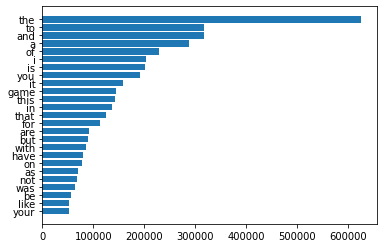

In [38]:
#Frecuencia de palabras CON los stopwords
plt.barh(words, freqs)
plt.show()

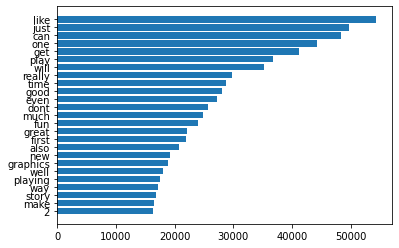

In [39]:
#Frecuencia de palabras SIN los stopwords (ni signos de puntuación)
plt.barh(words2, freqs2)
plt.show()

Vemos claramente que mejora muchísimo la información que nos arroja la frecuencia de palabras, una vez hemos quitado los stopwords y los signos de puntuación. Podríamos haber transformado los números a letras, pero lo haremos en la parte de preprocesado.

## N-grams más frecuentes

In [40]:
from nltk import ngrams
from nltk.probability import FreqDist

Vamos a ver los bigramas con stopwords y sin stopwords (ni signos de puntuación)

Preparación de los bigramas y trigramas con stopwords

In [41]:
bigrams_ = list(ngrams(frequence_words, 2))
trigrams_ = list(ngrams(frequence_words, 3))

In [42]:
print(len(bigrams_))
print(len(trigrams_))

11671986
11671985


In [43]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)

In [44]:
bg_freq.most_common(10)

[(('of', 'the'), 60541),
 (('the', 'game'), 46522),
 (('this', 'game'), 40451),
 (('in', 'the'), 36388),
 (('if', 'you'), 25164),
 (('to', 'the'), 25018),
 (('is', 'a'), 24859),
 (('on', 'the'), 23353),
 (('you', 'can'), 22668),
 (('and', 'the'), 22603)]

In [45]:
tg_freq.most_common(10)

[(('this', 'game', 'is'), 9046),
 (('a', 'lot', 'of'), 7834),
 (('the', 'game', 'is'), 7137),
 (('you', 'have', 'to'), 6630),
 (('one', 'of', 'the'), 6160),
 (('of', 'the', 'game'), 5226),
 (('some', 'of', 'the'), 4201),
 (('this', 'is', 'a'), 4153),
 (('the', 'graphics', 'are'), 3684),
 (('in', 'the', 'game'), 3179)]

In [46]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

In [47]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

Preparación de los bigramas y trigramas sin stopwords ni signos de puntuación 

In [48]:
bigrams_clean = list(ngrams(frequence_words_clean, 2))
trigrams_clean = list(ngrams(frequence_words_clean, 3))

In [49]:
print(len(bigrams_clean))
print(len(trigrams_clean))

5939364
5939363


Aqui ya vemos que hay más o menos la mitad que con stopwords

In [50]:
bg_freq_clean = FreqDist(bigrams_clean)
tg_freq_clean = FreqDist(trigrams_clean)

In [51]:
bg_freq_clean.most_common(10)

[(('pretty', 'much'), 2514),
 (('can', 'get'), 2426),
 (('single', 'player'), 2416),
 (('feel', 'like'), 2363),
 (('xbox', '360'), 2292),
 (('dont', 'know'), 2193),
 (('much', 'better'), 2121),
 (('final', 'fantasy'), 2048),
 (('even', 'though'), 1902),
 (('can', 'play'), 1883)]

In [52]:
tg_freq_clean.most_common(10)

[(('ive', 'ever', 'played'), 490),
 (('super', 'mario', 'bros'), 459),
 (('grand', 'theft', 'auto'), 455),
 (('metal', 'gear', 'solid'), 442),
 (('first', 'person', 'shooter'), 405),
 (('dont', 'get', 'wrong'), 348),
 (('single', 'player', 'campaign'), 333),
 (('ive', 'ever', 'seen'), 294),
 (('devil', 'may', 'cry'), 250),
 (('modern', 'warfare', '2'), 249)]

In [53]:
bg_freq_most_common_clean = bg_freq_clean.most_common(10)
bgs_clean = [str(bg[0]) for bg in bg_freq_most_common_clean]
bgs_f_clean = [bg[1] for bg in bg_freq_most_common_clean]

tg_freq_most_common_clean = tg_freq_clean.most_common(10)
tgs_clean = [str(tg[0]) for tg in tg_freq_most_common_clean]
tgs_f_clean = [tg[1] for tg in tg_freq_most_common_clean]

In [54]:
bgs_f_clean, bgs_clean = zip(*sorted(zip(bgs_f_clean, bgs_clean)))
tgs_f_clean, tgs_clean = zip(*sorted(zip(tgs_f_clean, tgs_clean)))

Plot de bigrama y trigrama CON stopwords

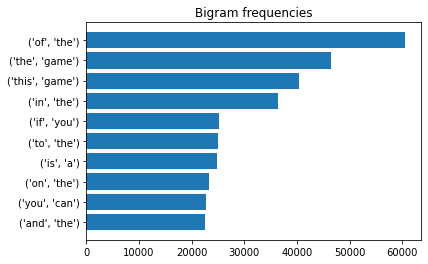

In [55]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

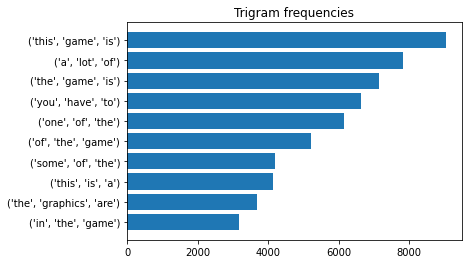

In [56]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

Plot de brigrama y trigrama SIN stopwords

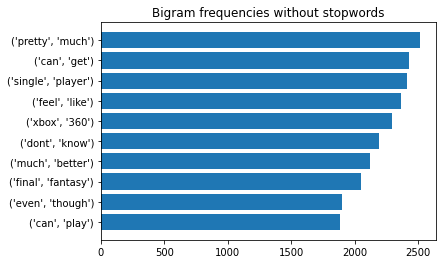

In [57]:
plt.barh(bgs_clean, bgs_f_clean)
plt.title('Bigram frequencies without stopwords')
plt.show()

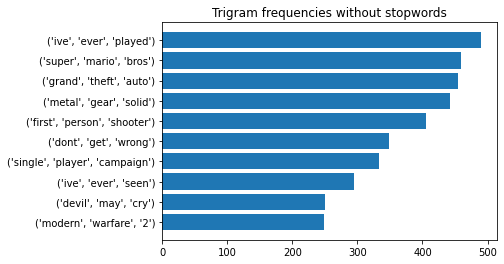

In [58]:
plt.barh(tgs_clean, tgs_f_clean)
plt.title('Trigram frequencies without stopwords')
plt.show()

A raíz de las gráficas desplegadas, vemos que, literalmente el bigrama y trigrama con los Stopwords, no nos dá ningún tipo de información relevante (y especialmente los bigramas). En cambio una vez le quitamos los Stopwords vemos  que nos aporta información valiosa, e incluso podríamos ver cuales son de los juegos que tienen más reviews (no sabemos si positivas o negativas)

## Nubes de palabras

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [60]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(' '.join(text))
    plt.figure( figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

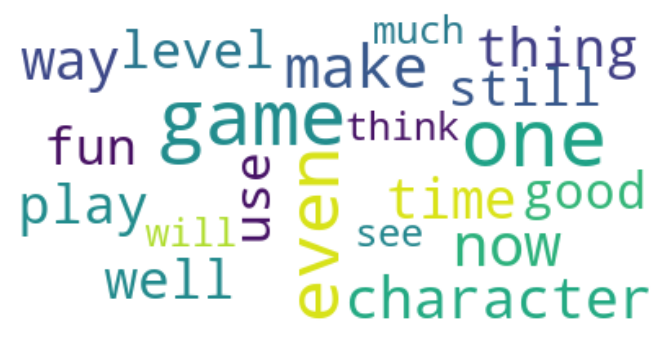

In [61]:
#Nube de palabras revirews negativas (1 y 2 estrellas)
word_list_neg = df_video_games_neg.reviewText.tolist()
word_list_neg =''.join(map(str, word_list_neg))
word_list_neg = word_list_neg.lower().split()
plot_word_cloud(word_list_neg)

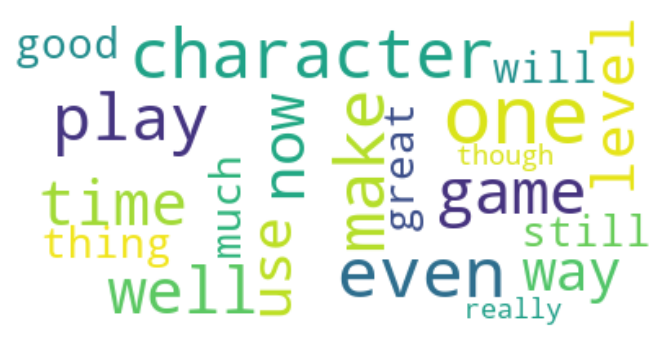

In [62]:
#Nube de palabras revirews negativas (3, 4 y 5 estrellas)
word_list_pos = df_video_games_pos_red.reviewText.tolist()
word_list_pos =''.join(map(str, word_list_pos))
word_list_pos = word_list_pos.lower().split()
plot_word_cloud(word_list_pos)

En este caso, con las nubes de palabras, no hay una diferencia muy significativa. Es muy probable que a se deba a la eliminación de algunos stopwords que pudieran darle connotación negativa a las palabras. Aún así, podríamos ver que, pese sean positivas o negativas, a los usuarios, les preocupan más o menos las mismas cosas en referencia a los videojuegos. 